<a href="https://colab.research.google.com/github/Leostark95/Introduccion_IA/blob/main/lab_05_02_model_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 05.02 - Model evaluation

In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [ ]:
from local.lib.rlxmoocapi import submit, session
session.LoginSequence(endpoint=init.endpoint, course_id=init.course_id, lab_id="L05.02", varname="student");

logging in as alexander.amaya@udea.edu.co... please wait

-------------
using course session ai4eng.v1.udea.r3::2024.2
success!! you are logged in
-------------


## Task 1: Partition randomly `numpy` arrays

observe we can select specific rows and/or columns on a numpy array

In [ ]:
import numpy as np

x = np.random.randint(100, size=(20,5))
x[:,0] = range(len(x))
x[0,:] = range(x.shape[1])
x

array([[ 0,  1,  2,  3,  4],
       [ 1, 24, 27, 35, 33],
       [ 2, 85, 14, 19, 85],
       [ 3, 92, 19,  1, 26],
       [ 4, 77, 16, 24,  9],
       [ 5, 96, 70, 20,  4],
       [ 6, 79,  2, 19, 24],
       [ 7, 45, 58, 18, 55],
       [ 8, 33,  8, 69, 60],
       [ 9, 41, 74, 37,  5],
       [10, 59, 78, 18, 68],
       [11, 25, 26, 31, 37],
       [12, 76,  7, 54, 16],
       [13, 14, 84,  4, 61],
       [14,  7,  0, 82, 24],
       [15, 87, 23, 94, 79],
       [16,  3, 32,  2, 60],
       [17, 16, 35, 30, 91],
       [18, 57, 84, 18, 67],
       [19,  7, 45, 14, 39]])

In [ ]:
ridxs = np.r_[2,4,5]
x[ridxs]

array([[ 2, 85, 14, 19, 85],
       [ 4, 77, 16, 24,  9],
       [ 5, 96, 70, 20,  4]])

In [ ]:
cidxs = np.r_[1,3]
x[:,cidxs]

array([[ 1,  3],
       [24, 35],
       [85, 19],
       [92,  1],
       [77, 24],
       [96, 20],
       [79, 19],
       [45, 18],
       [33, 69],
       [41, 37],
       [59, 18],
       [25, 31],
       [76, 54],
       [14,  4],
       [ 7, 82],
       [87, 94],
       [ 3,  2],
       [16, 30],
       [57, 18],
       [ 7, 14]])

In [ ]:
x[ridxs][:, cidxs]

array([[85, 19],
       [77, 24],
       [96, 20]])

and the dimensions of the array are accessible through `len` and `shape`

In [ ]:
len(x), x.shape

(20, (20, 5))

observe also how we can partition it

In [ ]:
x[:3]

array([[ 0,  1,  2,  3,  4],
       [ 1, 24, 27, 35, 33],
       [ 2, 85, 14, 19, 85]])

In [ ]:
x[3:]

array([[ 3, 92, 19,  1, 26],
       [ 4, 77, 16, 24,  9],
       [ 5, 96, 70, 20,  4],
       [ 6, 79,  2, 19, 24],
       [ 7, 45, 58, 18, 55],
       [ 8, 33,  8, 69, 60],
       [ 9, 41, 74, 37,  5],
       [10, 59, 78, 18, 68],
       [11, 25, 26, 31, 37],
       [12, 76,  7, 54, 16],
       [13, 14, 84,  4, 61],
       [14,  7,  0, 82, 24],
       [15, 87, 23, 94, 79],
       [16,  3, 32,  2, 60],
       [17, 16, 35, 30, 91],
       [18, 57, 84, 18, 67],
       [19,  7, 45, 14, 39]])

we can do the same thing with vectors

In [ ]:
v = np.arange(100,120)
v

array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119])

In [ ]:
v[:5], v[5:]

(array([100, 101, 102, 103, 104]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119]))

finally, observe how we can create a random permutation of a specific vector

In [ ]:
np.random.permutation(v)

array([101, 110, 103, 117, 113, 102, 108, 115, 116, 119, 106, 114, 107,
       105, 104, 100, 118, 109, 112, 111])

or the first natural numbers

In [ ]:
p = np.random.permutation(20)
p

array([13, 19,  6,  2, 12, 15, 16,  0,  3,  1,  9,  7, 18, 10, 14,  4,  8,
        5, 11, 17])

how do you interpret this?

In [ ]:
v[p[5:]]

array([115, 116, 100, 103, 101, 109, 107, 118, 110, 114, 104, 108, 105,
       111, 117])

In [ ]:
x[p[:5]]

array([[13, 14, 84,  4, 61],
       [19,  7, 45, 14, 39],
       [ 6, 79,  2, 19, 24],
       [ 2, 85, 14, 19, 85],
       [12, 76,  7, 54, 16]])

### assignment

in this task you will have to complete the function  `split_data` below so that:

- it accepts two arguments `X` and `y`, either of which can be any numpy array (1D, 2D, etc.) of the **same** size $n$ (observe the  `assert` statement), and a `pct`
- creates a random permutation of the natural number from $0$ to $n-1$
- partitions the permutations so that the first partition contains the first `n1_elements` $=$ `int(n * pct)` numbers, and the second partition the rest
- interpret the permutation partitions components as indexes to `X` and `y` so that they are partitioned into `X1`, `X2` and `y1`, `y2` respectively

note that **indexes to array** must be of type `int`. do the following to convert a float to int

In [ ]:
a,b = 10,.3
c = a*b
print (c)
c = int(c)
print(c)

3.0
3


In [ ]:
def split_data(X, y, pct):
    assert len(X)==len(y), "X and y must have the same length"
    assert pct>0 and pct<1, "pct must be in the (0,1) iterval"
    permutation = np.random.permutation(len(X))
    n1_elements = int(len(X)*pct)
    permutation_partition_1 = permutation[:n1_elements]
    permutation_partition_2 = permutation[n1_elements:]
    X1 = X[permutation_partition_1]
    X2 = X[permutation_partition_2]
    y1 = y[permutation_partition_1]
    y2 = y[permutation_partition_2]
    return X1, X2, y1, y2

check your solution manually with the following code

In [ ]:
XX = np.random.randint(100, size=(20,8))
yy = np.arange(100,100+len(XX))
XX[:,0] = range(len(XX))
XX[0,:] = range(XX.shape[1])
print (XX)
print (yy)

[[ 0  1  2  3  4  5  6  7]
 [ 1 93 20 44 83 19 71 97]
 [ 2 32 37 68 46  8 78 47]
 [ 3  3 29 79 50 23 87 67]
 [ 4 84 43 73 32 85 28 56]
 [ 5 22 96 96 76 30 95 71]
 [ 6 89 98 63 75 79 94 76]
 [ 7 85 29 70 60 54 74 50]
 [ 8 87 59 43 68  7 38 24]
 [ 9  7  9 36 86 16 20 67]
 [10 20 31 56 37 47 96 83]
 [11 14 48  8 84 24 72 24]
 [12 28 20 18 59 14 62 28]
 [13 32 51 14 81  7 22  7]
 [14 76  2 17  8 91 45  1]
 [15 86 56 19  1 48 18 38]
 [16 31 70 64 92  1 91 14]
 [17  8 70 93  8 78 20 23]
 [18 81 12 51 47 88 71 59]
 [19 85 95 85  2 44 23 61]]
[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119]


In [ ]:
Xtr, Xts, ytr, yts = split_data(XX, yy, pct=.7)

In [ ]:
# check partition ok
np.sum(XX), np.sum(Xtr) + np.sum(Xts), np.sum(yy), np.sum(ytr)+np.sum(yts)

(6809, 6809, 2190, 2190)

In [ ]:
print (Xtr, "\n--")
print (Xts, "\n--")
print (ytr, "\n--")
print (yts, "\n--")

[[ 7 85 29 70 60 54 74 50]
 [14 76  2 17  8 91 45  1]
 [11 14 48  8 84 24 72 24]
 [ 4 84 43 73 32 85 28 56]
 [15 86 56 19  1 48 18 38]
 [16 31 70 64 92  1 91 14]
 [ 0  1  2  3  4  5  6  7]
 [ 1 93 20 44 83 19 71 97]
 [17  8 70 93  8 78 20 23]
 [13 32 51 14 81  7 22  7]
 [ 5 22 96 96 76 30 95 71]
 [18 81 12 51 47 88 71 59]
 [ 8 87 59 43 68  7 38 24]
 [ 2 32 37 68 46  8 78 47]] 
--
[[ 3  3 29 79 50 23 87 67]
 [12 28 20 18 59 14 62 28]
 [ 9  7  9 36 86 16 20 67]
 [ 6 89 98 63 75 79 94 76]
 [19 85 95 85  2 44 23 61]
 [10 20 31 56 37 47 96 83]] 
--
[107 114 111 104 115 116 100 101 117 113 105 118 108 102] 
--
[103 112 109 106 119 110] 
--


In [ ]:
Xts

array([[ 3,  3, 29, 79, 50, 23, 87, 67],
       [12, 28, 20, 18, 59, 14, 62, 28],
       [ 9,  7,  9, 36, 86, 16, 20, 67],
       [ 6, 89, 98, 63, 75, 79, 94, 76],
       [19, 85, 95, 85,  2, 44, 23, 61],
       [10, 20, 31, 56, 37, 47, 96, 83]])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_01");


## Task 2: Fit a model and make predictions

observe how we create new data from synthetic datasets available in `sklearn`

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from local.lib import mlutils
%matplotlib inline

In [ ]:
X, y = make_moons(200, noise=0.2)
X.shape, y.shape

((200, 2), (200,))

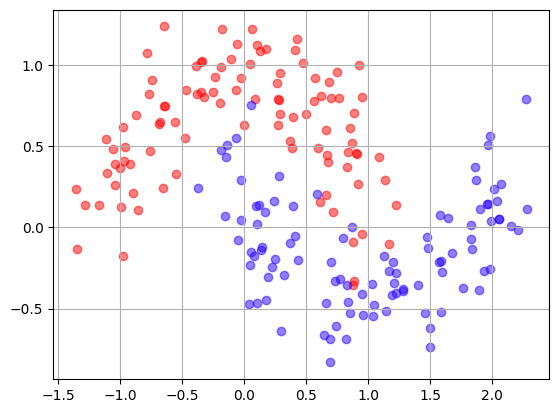

In [ ]:
mlutils.plot_2Ddata(X,y); plt.grid();

observe also how we create an algorithm instance and fit a model

(0.492025, 0.507975)

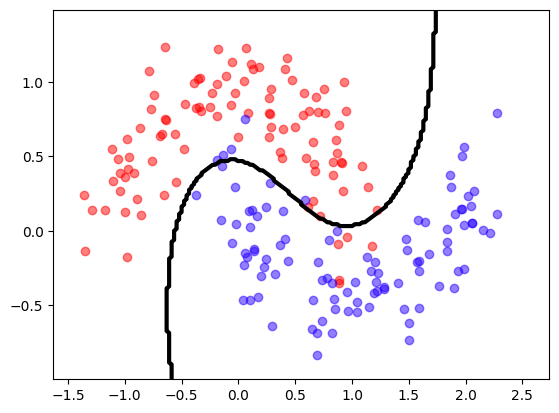

In [ ]:
from sklearn.svm import SVC
estimator = SVC(gamma=1)
estimator.fit(X,y)
mlutils.plot_2Ddata_with_boundary(estimator.predict, X, y)

and how we make predictions

In [ ]:
preds = estimator.predict(X)
print (preds.shape)
preds

(200,)


array([0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0])

in this task you have to complete the following function so that:

- it makes two non-random partitions of `X` and `y`. One containing the first half of the data and one containing the second part. If the number of elements of `X` is odd, then the second half will contain one more element than the first half.
- it fits the model with the first part of the data
- it makes predictions on the second half of the data
- returns the estimator fitted, and the predictions on the second half of the data.

In [ ]:
def fit_and_predict(estimator, X, y):
    assert len(X)==len(y), "X and y must have the same length"

    partition1 = int(len(X)//2)
    X1 = X[:partition1]
    X2 = X[partition1:]
    Y1 = y[:partition1]
    Y2 = y[partition1:]

    estimator.fit(X1,Y1)
    predictions = estimator.predict(X2)


    return estimator, predictions

In [ ]:
numero = 95
valor = numero //2
valor2 = valor + 1
print(valor)
print(valor2)

47
48


check your code. your predictions should be similar to

    preds
    >> array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

In [ ]:
X = np.array([[ 0.74799424, -0.5867667 ],
       [-0.64457753,  1.25127894],
       [ 0.53682593,  0.10931563],
       [-0.88825294, -0.06987509],
       [ 0.99612638, -0.52295157],
       [ 1.20586692,  0.01930477],
       [-0.19368482,  0.65121567],
       [ 0.1973759 ,  0.82250723],
       [ 0.94859234, -0.5457241 ],
       [ 1.87967948, -0.22740261],
       [ 0.58766146,  0.3982837 ],
       [ 0.27731571,  1.14369568],
       [-0.67421956,  0.12785382],
       [ 0.56957459,  1.05330376],
       [ 1.52435938, -0.29864338],
       [-0.15973608,  0.21790711],
       [ 1.59037406, -0.56875485],
       [ 0.43257507, -0.48900315],
       [ 1.09440413, -0.73789029],
       [-0.32940869,  0.74671384]])
y = np.array([1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0])
X.shape, y.shape

((20, 2), (20,))

In [ ]:
from sklearn.linear_model import LogisticRegression
estimator = LogisticRegression()
estimator, preds = fit_and_predict(estimator, X, y)
preds

array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0])

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_02");


## Task 3: Select data with indices

Observe how we can create a vector or matrix of `True/False` (boolean) by applying a condition to any matrix or vector

In [ ]:
import numpy as np
y = np.random.randint(10, size=15)
print (y)

[0 4 0 8 2 8 0 3 7 5 0 5 0 1 0]


In [ ]:
indexes = np.where(y==5)
print(indexes)

(array([ 9, 11]),)


In [ ]:
y_less_than_5 = y<5
print (y_less_than_5)

[ True  True  True False  True False  True  True False False  True False
  True  True  True]


and how we can select elements of a vector using a boolean vector of the same length

In [ ]:
y[y_less_than_5]

array([0, 4, 0, 2, 0, 3, 0, 0, 1, 0])

In [ ]:
y[y<5]

array([0, 4, 0, 2, 0, 3, 0, 0, 1, 0])

python doesn't really care how you construct the vector of booleans to index any other vector or array

In [ ]:
v = np.random.randint(20, size=15)
v

array([ 3,  2, 15,  9,  1, 16,  2,  3,  0, 10, 11,  3,  1, 10,  1])

In [ ]:
v[y<5]

array([ 3,  2, 15,  1,  2,  3, 11,  1, 10,  1])

in this task you will complete the function `select_per_class` such that:

- receives an array of data `X` and a vector of labels `y`, of the same length
- the labels `y` are binary, they can only have values `0` or `1`
- makes two partitions of `X`, one corresponding to the places where y is 0, and another where y is 1
- returns the two partitions

For instance, for the following X and y

    X = np.array([[8, 8, 5, 2, 0, 0],
                  [4, 4, 8, 1, 3, 7],
                  [4, 5, 3, 6, 9, 6],
                  [0, 3, 5, 3, 5, 3],
                  [0, 7, 2, 7, 1, 7],
                  [5, 7, 7, 1, 8, 5],
                  [2, 5, 7, 3, 8, 0],
                  [7, 2, 5, 9, 8, 7],
                  [1, 6, 6, 1, 6, 0],
                  [0, 7, 6, 5, 3, 4]])

    y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

your function must return the following two matrices:

    [[8 8 5 2 0 0]
     [4 4 8 1 3 7]
     [4 5 3 6 9 6]
     [0 3 5 3 5 3]
     [2 5 7 3 8 0]
     [7 2 5 9 8 7]]
     
    [[0 7 2 7 1 7]
     [5 7 7 1 8 5]
     [1 6 6 1 6 0]
     [0 7 6 5 3 4]]


In [ ]:
def select_per_class(X, y):
    indexes = np.where(y==0)
    indexes1 = np.where(y==1)
    for i,j in zip(indexes,indexes1):
      X1 = X[i]
      X2 = X[j]

    return X1, X2

check manually your code

In [ ]:
X = np.array([[8, 8, 5, 2, 0, 0],
              [4, 4, 8, 1, 3, 7],
              [4, 5, 3, 6, 9, 6],
              [0, 3, 5, 3, 5, 3],
              [0, 7, 2, 7, 1, 7],
              [5, 7, 7, 1, 8, 5],
              [2, 5, 7, 3, 8, 0],
              [7, 2, 5, 9, 8, 7],
              [1, 6, 6, 1, 6, 0],
              [0, 7, 6, 5, 3, 4]])

y = np.array([0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

In [ ]:
a,b = select_per_class(X, y)
print (a)
print (b)

[[8 8 5 2 0 0]
 [4 4 8 1 3 7]
 [4 5 3 6 9 6]
 [0 3 5 3 5 3]
 [2 5 7 3 8 0]
 [7 2 5 9 8 7]]
[[0 7 2 7 1 7]
 [5 7 7 1 8 5]
 [1 6 6 1 6 0]
 [0 7 6 5 3 4]]


**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_03");


## Task 4: Measure accuracy

complete the following function such that:

- it receives to binary vectors (composed of 0's and 1's) of the same length
- returns the percentage of elements that are the same in both vectors

recall that

- if `a` and `b` are vectors of the same length a==b   returns a vector of booleans in which positions in True signal that elements in those position are the same
- if `k` is a vector of booleans, `sum(k)` returns the number of `True` elements.


for the following two vectors you should get 0.375

    a = np.array([1,0,0,0,1,1,0,0])
    b = np.array([1,1,1,1,0,1,0,1])
    accuracy(a, b)
    >>> 0.375


In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])

In [ ]:
k = a == b
display(k)
display(sum(k))

array([ True, False, False, False, False,  True,  True, False])

3

In [ ]:
def accuracy(y_true, y_pred):
    assert len(y_true)==len(y_pred), "y_true and y_pred must have the same length"
    n = len(y_true)

    k = y_true == y_pred
    result = sum(k)/n
    return result

In [ ]:
a = np.array([1,0,0,0,1,1,0,0])
b = np.array([1,1,1,1,0,1,0,1])
accuracy(a,b)

0.375

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_04");


## Task 5: Random split, fit and predict

complete the following function so that:

- fits the estimator with a random sample of size `train_pct` of the data `X` and binary labels `y`. You can use the `split_data` function developed previously
- makes predictions on the test part of the data
- measures accuracy of those predictions. you may use the function created previously
- returns the estimator fitted, the test part of `X` and `y`, and the accuracy measured


the execution below should return something with the following structure (the actual numbers will change)


    (LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                        intercept_scaling=1, l1_ratio=None, max_iter=100,
                        multi_class='warn', n_jobs=None, penalty='l2',
                        random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                        warm_start=False), array([[-0.76329684,  0.2572069 ],
            [ 1.02356829,  0.37629873],
            [ 0.32099415,  0.82244488],
            [ 1.08858315, -0.61299904],
            [ 0.58470767,  0.58510559],
            [ 1.60827644, -0.15477173],
            [ 1.53121784,  0.78121504],
            [-0.42734156,  0.87585237],
            [-0.36368682,  0.72152586],
            [ 1.05312619,  0.19835526]]), array([0, 0, 1, 1, 0, 1, 1, 0, 0, 0]), 0.6)

In [ ]:

def split_fit_predict(estimator, X, y, train_pct):
    def split_data(X, y, train_pct):
        assert len(X)==len(y), "X and y must have the same length"
        assert train_pct>0 and train_pct<1, "pct must be in the (0,1) interval"
        permutation = np.random.permutation(len(X))
        n1_elements = int(len(X)*train_pct)
        permutation_partition_1 = permutation[:n1_elements]
        permutation_partition_2 = permutation[n1_elements:]
        X1 = X[permutation_partition_1]
        X2 = X[permutation_partition_2]
        y1 = y[permutation_partition_1]
        y2 = y[permutation_partition_2]
        return X1, X2, y1, y2

    Xtr, Xts, ytr, yts = split_data(X, y, train_pct)

    def accuracy(y_true, y_pred):
        assert len(y_true)==len(y_pred), "y_true and y_pred must have the same length"
        n = len(y_true)
        k = y_true == y_pred
        result = sum(k)/n
        return result

    estimator.fit(Xtr, ytr)
    preds_ts = estimator.predict(Xts)
    return estimator, Xts, yts, accuracy(yts, preds_ts)



In [ ]:
from sklearn.linear_model import LogisticRegression

X, y = make_moons(100, noise=0.2)
estimator = LogisticRegression(solver="lbfgs")
split_fit_predict(estimator, X, y, train_pct=0.9)


(LogisticRegression(),
 array([[ 1.48341665,  0.3425732 ],
        [ 2.01993989,  0.1702861 ],
        [ 0.48871371,  0.74385696],
        [ 0.73850675,  0.60625442],
        [ 0.7880663 ,  0.55388931],
        [-0.06877089,  0.98656328],
        [-0.72223114,  0.81789259],
        [ 1.02553652, -0.42403138],
        [ 1.31610997, -0.90230402],
        [-0.67353581,  0.26652421]]),
 array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0]),
 1.0)

**submit your code**

In [ ]:
student.submit_task(globals(), task_id="task_05");
